### Concrete Compressive Strength Prediction (Regression) Using Keras Sequential ANN

#### Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load dataset

In [2]:
dataset = pd.read_excel('Concrete_Data.xls')
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
dataset.shape

(1030, 9)

In [4]:
################################
# basic data viz:
# check types of features
# nans
# basic stat
# make column names more friendly to use
# histograms/scatter plots
# heatmaps
# bin the target to 3 classes and check how the pairplot behaves with that
    # hint - use qcut - (numpy's)

In [5]:
df = dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
df.isna().sum().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water (component 4)(kg in a m^3 mixture),1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [8]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
cols2 = [x[:3]   for x in df.columns]
cols2

['Cem', 'Bla', 'Fly', 'Wat', 'Sup', 'Coa', 'Fin', 'Age', 'Con']

In [10]:
cols_org= df.columns

In [11]:
df2 = df.copy()

In [12]:
df2.columns = cols2
df2.head()

,Cem,Bla,Fly,Wat,Sup,Coa,Fin,Age,Con
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [13]:
import seaborn as sns

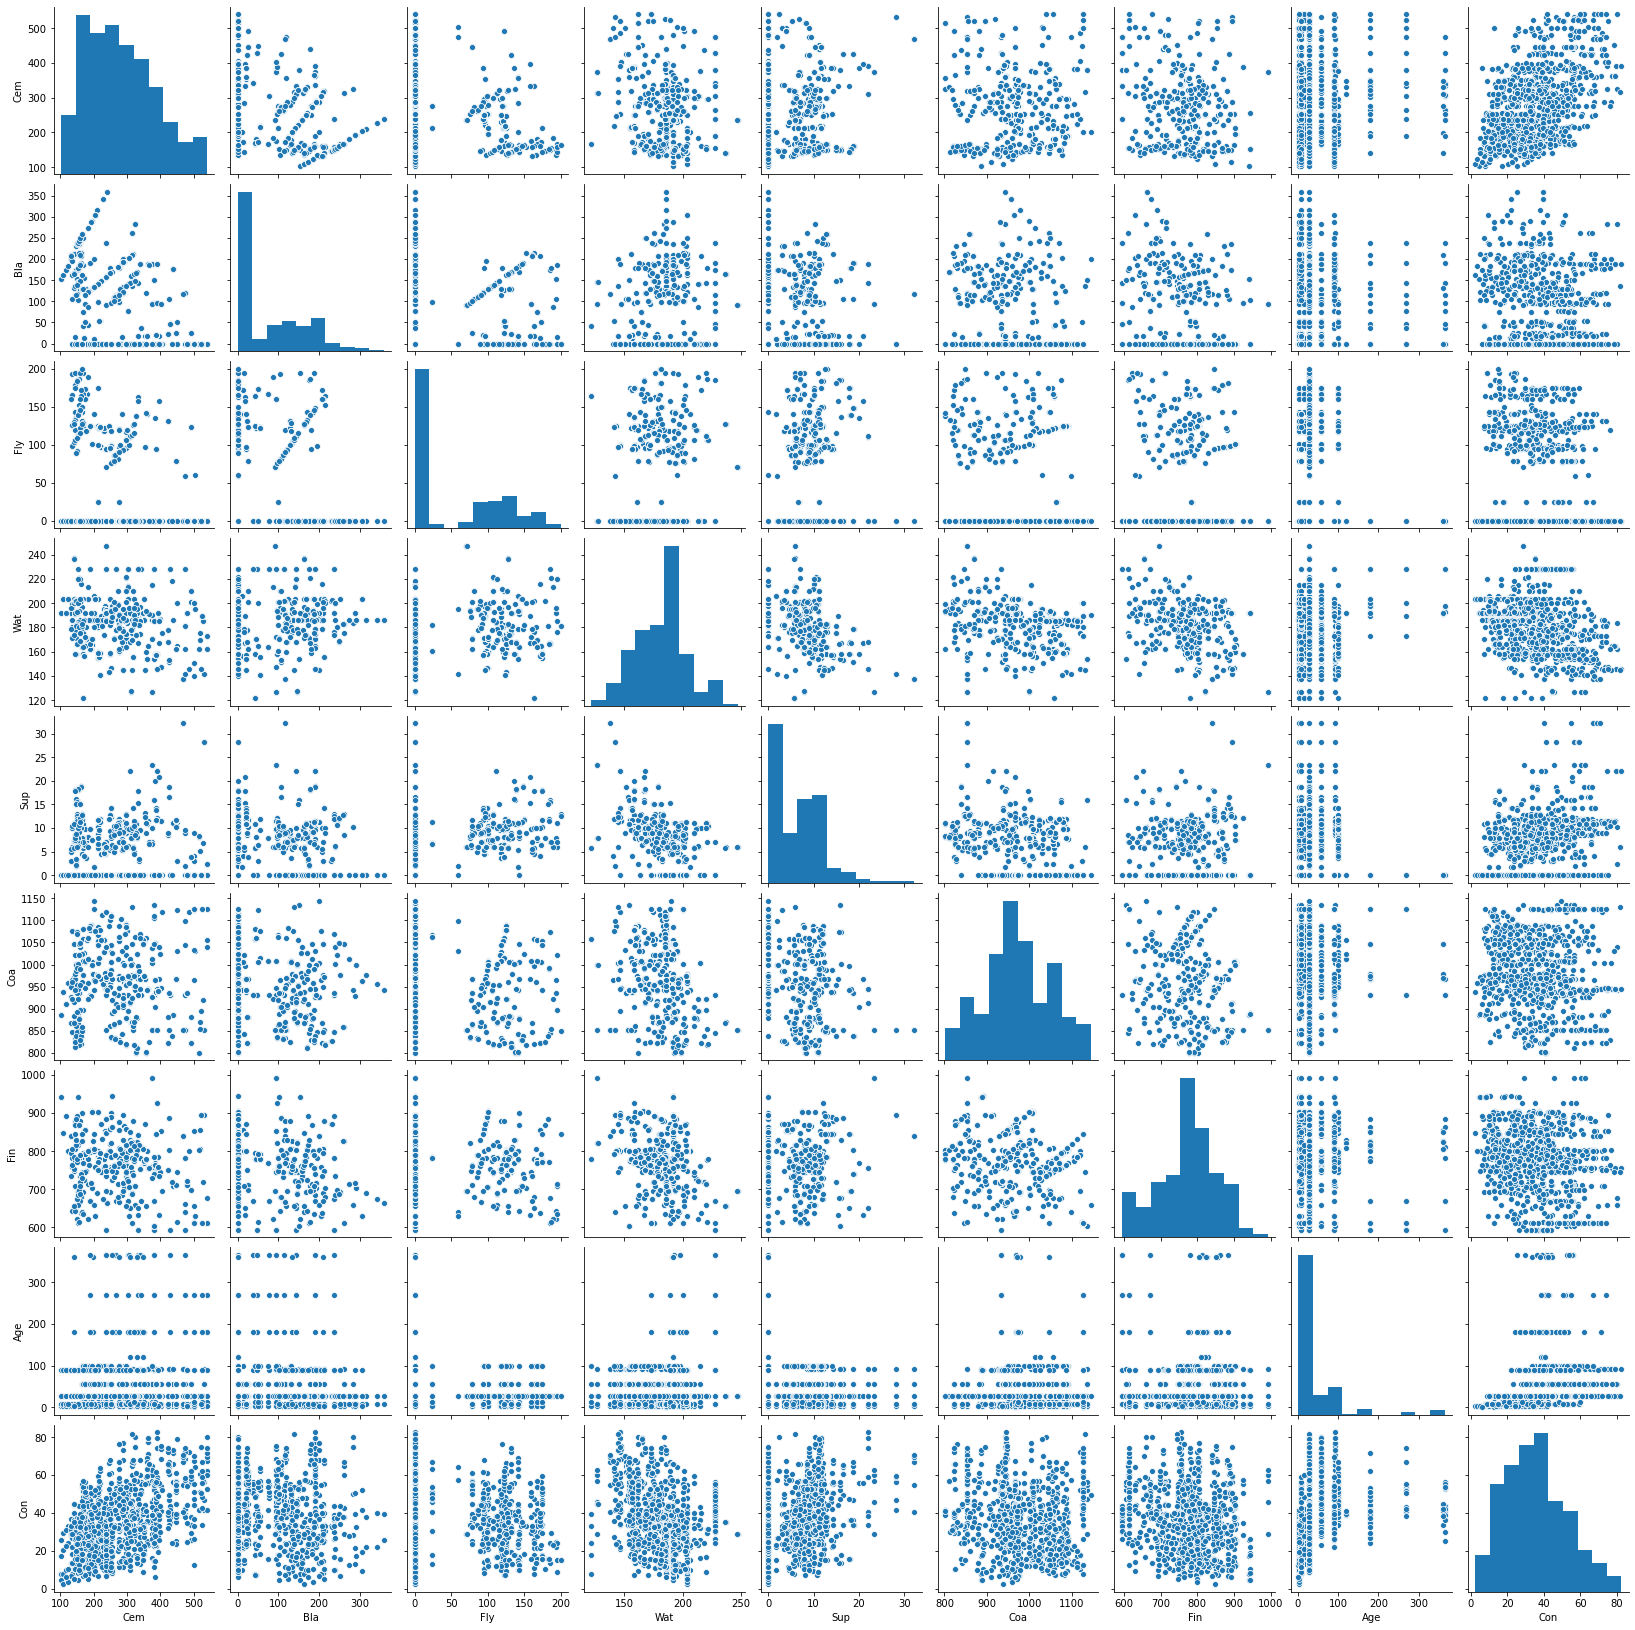

In [14]:
sns.pairplot(df2)

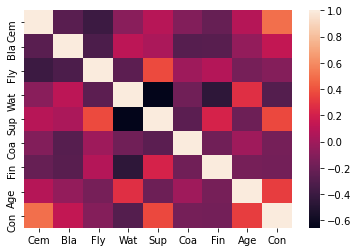

In [15]:
sns.heatmap(df2.corr())

In [16]:
df3 = df2.copy()

In [17]:
df3.Con = pd.qcut(df3.Con, 3)
df3.head()

,Cem,Bla,Fly,Wat,Sup,Coa,Fin,Age,Con
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,"(41.369, 82.599]"
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,"(41.369, 82.599]"
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,"(26.965, 41.369]"
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,"(26.965, 41.369]"
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,"(41.369, 82.599]"


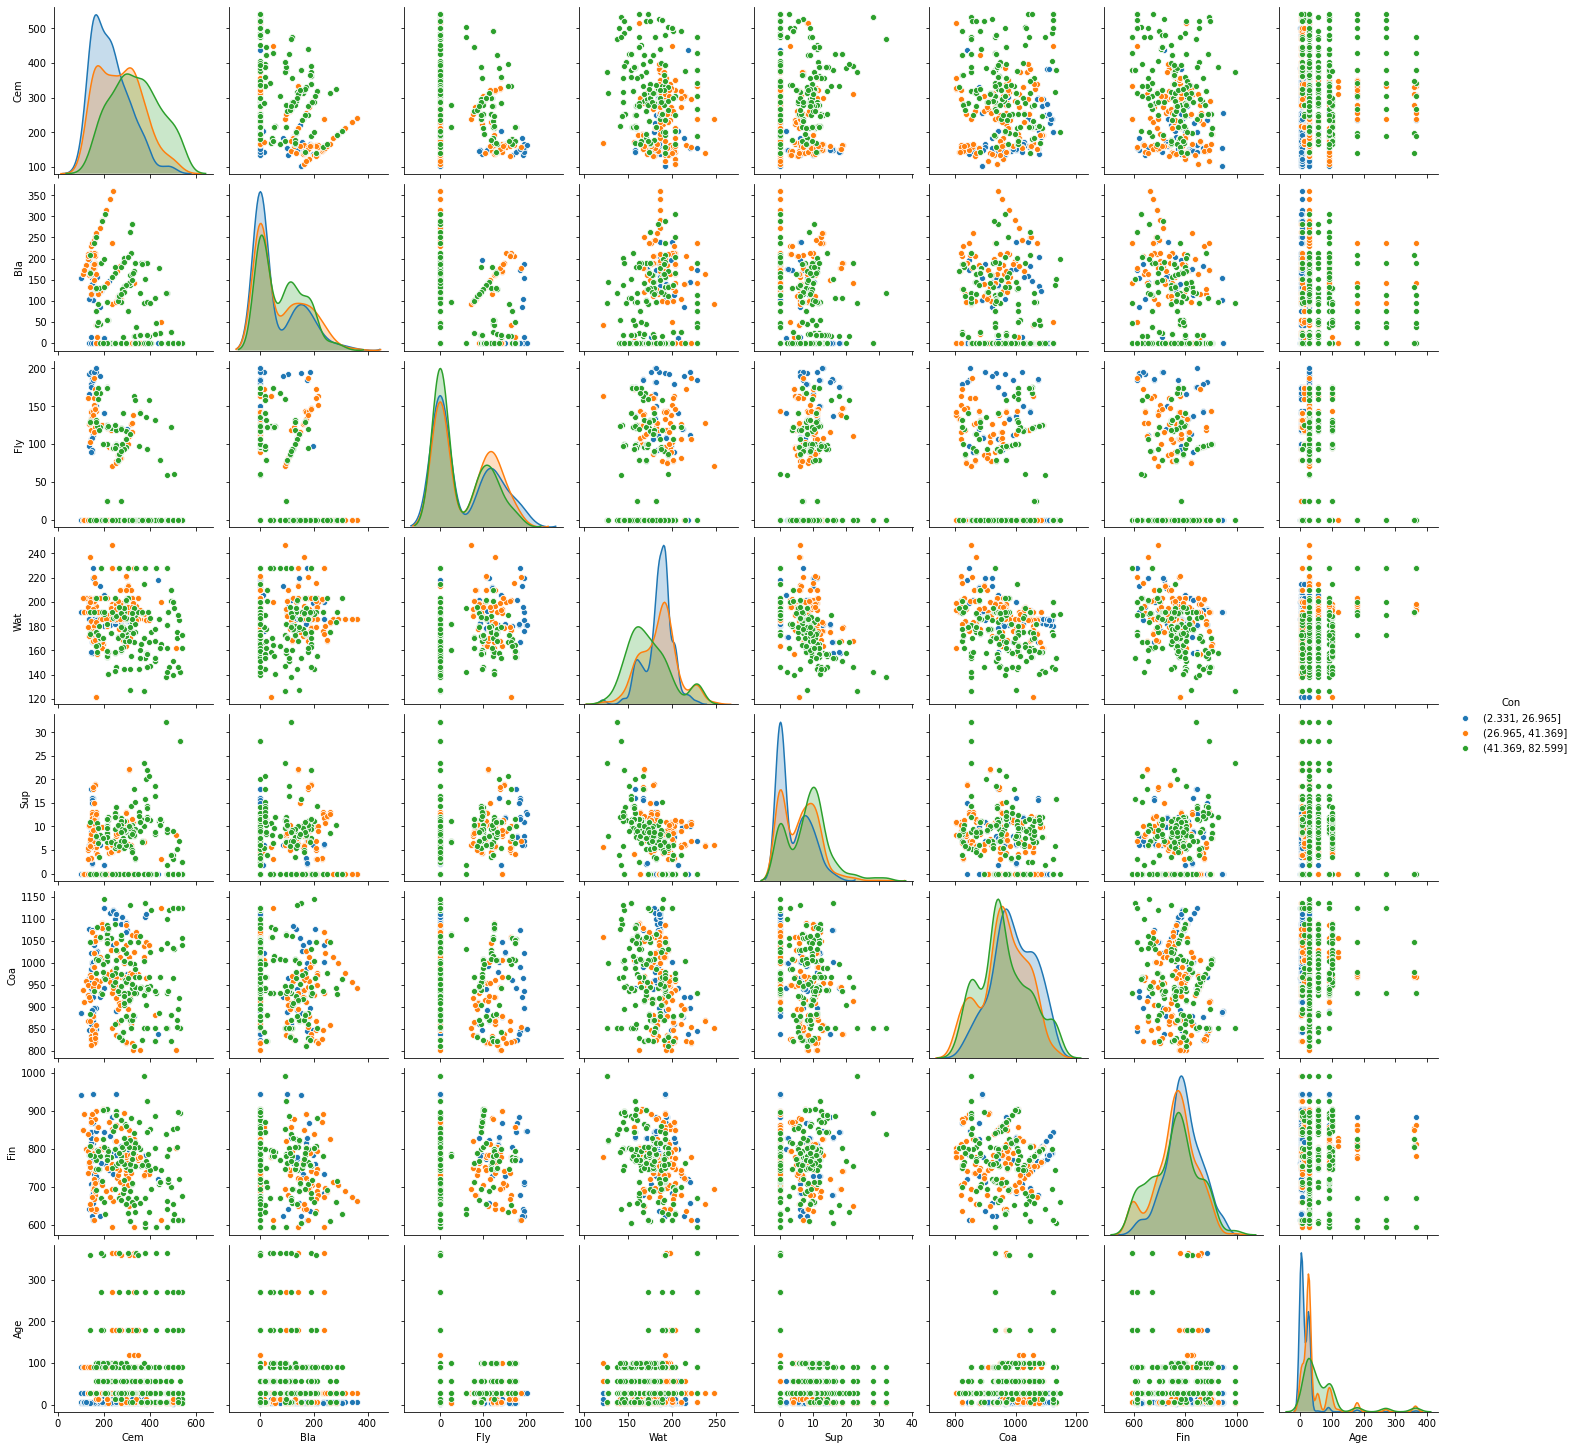

In [18]:
sns.pairplot(df3, hue='Con')

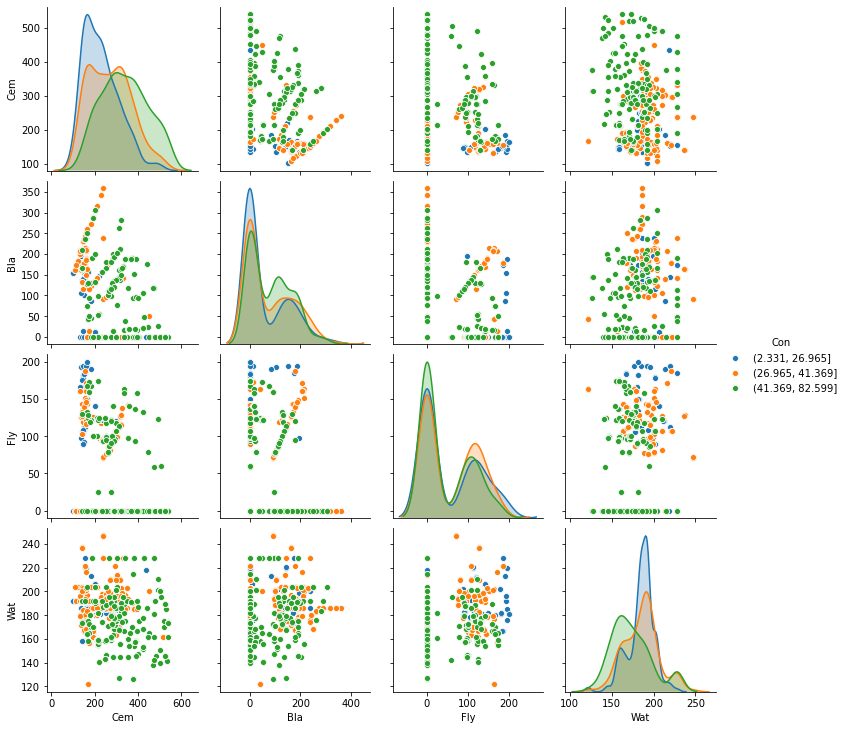

In [19]:
sns.pairplot(  pd.concat([df3.iloc[:,:4], df3.Con ], axis=1),  hue='Con'   )

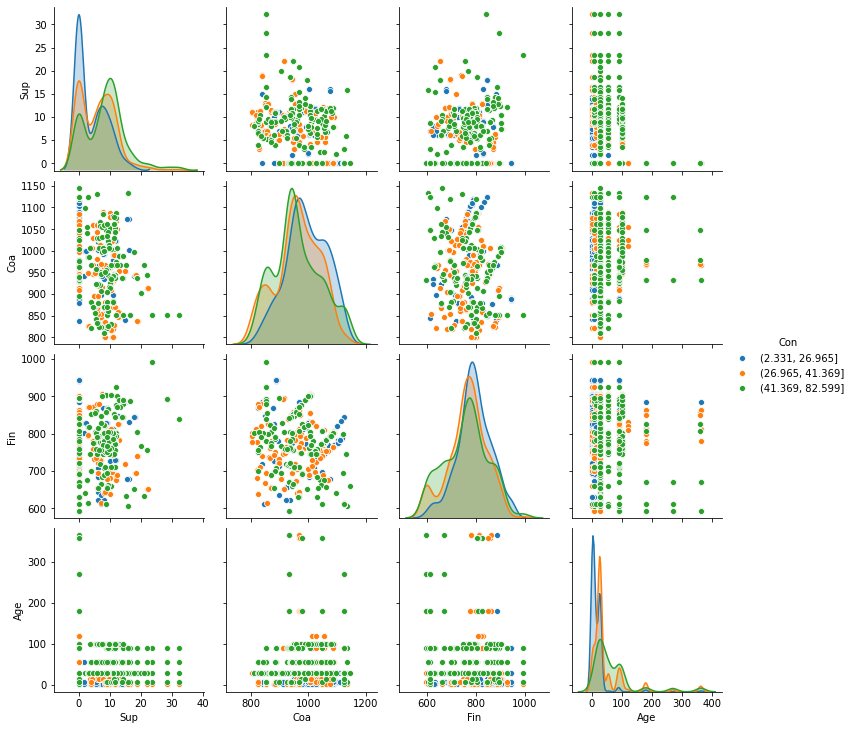

In [20]:
sns.pairplot(  pd.concat([df3.iloc[:,4:8], df3.Con ], axis=1),  hue='Con'   )

#### Create feature and target datasets

In [21]:
feature_dataset = dataset.iloc[:,0:8]
target_dataset = dataset.iloc[:,-1]

#### Feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler

# DO NOT DO LIKE THAT!!
# scale feature dataset
sc_X = StandardScaler()
X = sc_X.fit_transform(np.array(feature_dataset))
# scale target dataset
sc_y = StandardScaler()
y = sc_y.fit_transform(np.array(target_dataset).reshape(-1,1))

#### Train Test Split

In [23]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)

#### Keras Sequential ANN Model

In [24]:
# Sequential Artificial Neural Network Model
from keras.models import Sequential
from keras.layers import Dense, Dropout
np.random.seed(47)
# define the keras model
model = Sequential()
# Layer 1
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
# Dropout regularization is added to avoid overfitting
model.add(Dropout(0.1))
# Layer 2
model.add(Dense(50, activation='relu'))
# Dropout regularization is added to avoid overfitting
model.add(Dropout(0.1))
# Layer 3
model.add(Dense(50, activation='relu'))
# Output Layer
model.add(Dense(1))
#Compile the model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

model.summary()

Using TensorFlow backend.
C:\Users\igaln\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\igaln\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\igaln\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\igaln\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                450       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 5,601
Trainable params: 5,601
Non-trainable params: 0
____________________________________________________

In [25]:
# train the model in 32 batch size and 100 epochs
model.fit(X_train, y_train, batch_size=32, epochs=100)


Epoch 1/100
824/824 [==============================] - 0s 299us/step - loss: 0.7640 - mae: 0.7640
Epoch 2/100
824/824 [==============================] - 0s 52us/step - loss: 0.6048 - mae: 0.6048
Epoch 3/100
824/824 [==============================] - 0s 46us/step - loss: 0.5167 - mae: 0.5167
Epoch 4/100
824/824 [==============================] - 0s 50us/step - loss: 0.4609 - mae: 0.4609
Epoch 5/100
824/824 [==============================] - 0s 47us/step - loss: 0.4599 - mae: 0.4599
Epoch 6/100
824/824 [==============================] - 0s 49us/step - loss: 0.4202 - mae: 0.4202
Epoch 7/100
824/824 [==============================] - 0s 47us/step - loss: 0.4150 - mae: 0.4150
Epoch 8/100
824/824 [==============================] - 0s 55us/step - loss: 0.3911 - mae: 0.3911
Epoch 9/100
824/824 [==============================] - 0s 52us/step - loss: 0.3786 - mae: 0.3786
Epoch 10/100
824/824 [==============================] - 0s 51us/step - loss: 0.3722 - mae: 0.3722
Epoch 11/100
824/824 [=====

#### Prediction on train data

In [26]:
# prediction on training dataset
train_prediction = model.predict(X_train)
train_result = pd.DataFrame(sc_y.inverse_transform(y_train))
train_result.columns = ['actual']
train_result['predicted'] = sc_y.inverse_transform(train_prediction)

In [27]:
train_result

,actual,predicted
0,27.681082,28.298830
1,62.052840,59.258331
2,23.800712,23.276840
3,33.398217,34.947361
4,7.398077,14.265609
...,...,...
819,24.400556,28.628956
820,42.216615,40.342617
821,33.563692,41.173054
822,68.299493,64.204292


In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_train, model.predict(X_train)))
print ('Training Data have Root Mean Squared Error of {}'.format(rms))

Training Data have Root Mean Squared Error of 0.2226472173014012


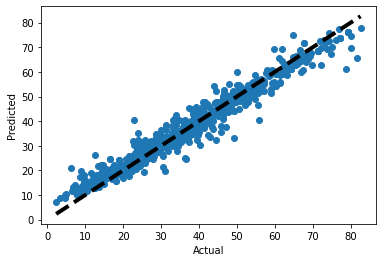

In [29]:
# Vizualiation (actual vs predicted) on training dataset
fig, ax = plt.subplots()
ax.scatter(train_result['actual'], train_result['predicted'])
ax.plot([train_result['actual'].min(), train_result['actual'].max()], [train_result['actual'].min(), train_result['actual'].max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

#### Prediction on test data

In [30]:
# prediction on testing dataset
prediction = model.predict(X_test)
test_result = pd.DataFrame(sc_y.inverse_transform(y_test))
test_result.columns = ['actual']
test_result['predicted'] = sc_y.inverse_transform(prediction)

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, model.predict(X_test)))
print ('Test Data have Root Mean Squared Error of {}'.format(rms))

Test Data have Root Mean Squared Error of 0.334510529728025


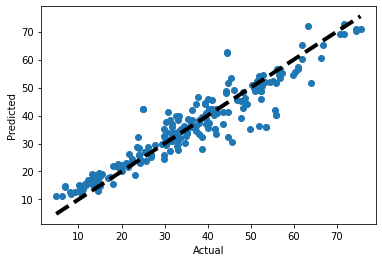

In [32]:
# Vizualiation (actual vs predicted) on testing dataset
fig, ax = plt.subplots()
ax.scatter(test_result['actual'], test_result['predicted'])
ax.plot([test_result['actual'].min(), test_result['actual'].max()], [test_result['actual'].min(), test_result['actual'].max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [33]:
##############################
# RMSE of 0.34 vs 0.23 
# Keras - use random state
# 1. try to increase the overfit - dropouts, epcohs
# 2. try to decrease the overfit - dropouts, epcohs


In [34]:
# change in code and run all nb

In [35]:
######################################################################################
# 3. try different activation fucntions - relu, sigmoid, tanh, with epochs = 200, make keras print silence...
#    compare only train error for now. which wins and why?

In [47]:
# A = 'relu'
# A = 'sigmoid'
# A = 'tanh'
A = 'class_001_activation'


np.random.seed(47)
# define the keras model
model = Sequential()
# Layer 1
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
# Dropout regularization is added to avoid overfitting
model.add(Dropout(0.1))
# Layer 2
model.add(Dense(50, activation=A))
# Dropout regularization is added to avoid overfitting
model.add(Dropout(0.1))
# Layer 3
model.add(Dense(50, activation=A))
# Output Layer
model.add(Dense(1))
#Compile the model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

model.fit(X_train, y_train, batch_size=32, epochs=500, verbose=1)

train_prediction = model.predict(X_train)
train_result = pd.DataFrame(sc_y.inverse_transform(y_train))
train_result.columns = ['actual']
train_result['predicted'] = sc_y.inverse_transform(train_prediction)
rms = sqrt(mean_squared_error(y_train, model.predict(X_train)))
print ('Training Data have Root Mean Squared Error of {}'.format(rms))

prediction = model.predict(X_test)
test_result = pd.DataFrame(sc_y.inverse_transform(y_test))
test_result.columns = ['actual']
test_result['predicted'] = sc_y.inverse_transform(prediction)
rms = sqrt(mean_squared_error(y_test, model.predict(X_test)))
print ('Test Data have Root Mean Squared Error of {}'.format(rms))

Epoch 1/500
824/824 [==============================] - 0s 340us/step - loss: 0.8121 - mae: 0.8121
Epoch 2/500
824/824 [==============================] - 0s 56us/step - loss: 0.8119 - mae: 0.8119
Epoch 3/500
824/824 [==============================] - 0s 62us/step - loss: 0.8116 - mae: 0.8116
Epoch 4/500
824/824 [==============================] - 0s 61us/step - loss: 0.8113 - mae: 0.8113
Epoch 5/500
824/824 [==============================] - 0s 62us/step - loss: 0.8111 - mae: 0.8111
Epoch 6/500
824/824 [==============================] - 0s 56us/step - loss: 0.8108 - mae: 0.8108
Epoch 7/500
824/824 [==============================] - 0s 62us/step - loss: 0.8107 - mae: 0.8107
Epoch 8/500
824/824 [==============================] - 0s 52us/step - loss: 0.8106 - mae: 0.8106
Epoch 9/500
824/824 [==============================] - 0s 58us/step - loss: 0.8105 - mae: 0.8105
Epoch 10/500
824/824 [==============================] - 0s 51us/step - loss: 0.8104 - mae: 0.8104
Epoch 11/500
824/824 [======

In [37]:
# RELU
# Training Data have Root Mean Squared Error of 0.161332131068619
# Test Data have Root Mean Squared Error of 0.30294634425243594


In [38]:
# SIG
# Training Data have Root Mean Squared Error of 0.22311317399202973
# Test Data have Root Mean Squared Error of 0.3006072140934744


In [39]:
# TANH
# Training Data have Root Mean Squared Error of 0.18475490011760645
# Test Data have Root Mean Squared Error of 0.3216395212112389


In [40]:
##########################################
# MODIFIED ACTIVATION FUNCTION 
# write a modified activation function to to have the mae freeze over the iterations
#     (ephocs = 200)
# look for how to create costume activation function in keras...

In [46]:
from keras.layers import Activation
import keras.backend as K
def class_001_activation(x):
    return 0.00000001*x 

from keras.utils.generic_utils import get_custom_objects
get_custom_objects().update( {'class_001_activation' : Activation(class_001_activation)  })

In [ ]:
f' ---> 0    w' = w - (--->0)